# Exploratory Data Analysis - IPL Dataset        

### Table of Contents
- 1. [Problem Statement](#section1)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1  [Convert "date" variable dtype from object to datetime ](#section401)<br/>
    - 4.2  [Missing Data and its imputation](#section402)<br/>
    - 4.3  [Removing duplicate team names, venue names and city names](#section403)<br/>
    - 4.4  [Reassigning Id values](#section404)<br/>
    - 4.5  [Handling NaN data](#section405)<br/>
- 5. [Questions](#section5)</br>
    - 5.1  [Which season had most number of matches ?](#section501)<br/>
    - 5.2  [Season Winners](#section502)<br/>
    - 5.3  [Most successful IPL Team](#section503)<br/>
    - 5.4  [Which is the best defending team](#section504)<br/>
    - 5.5  [Which is the best chasing team ?](#section505)<br/>
    - 5.6  [Most number of Man of the Match awards in IPL](#section506)<br/>
    - 5.7  [Has toss winning helped in match winning ?](#section507)<br/>
    - 5.8  [What toss decision helped toss winner to win the match ?](#section508)<br/>
    - 5.9  [Which toss decision helped which team to win matches ?](#section509)<br/>
    - 5.10 [Which toss decision helped teams to win when DL was applied ?](#section510)<br/>
    - 5.11 [Which isthe best stadium for winning by wickets ?](#section511)<br/>
    - 5.12 [Which is the best stadium for winning by runs ?](#section512)<br/>
    - 5.13 [Toss decision taken at the venues (Batting first or Fielding first)](#section513)<br/>
    - 5.14 [In which city did weather affect matches ?](#section514)<br/>
    - 5.15 [Win percentage of teams who won the toss for each team.](#section515)<br/>
    - 5.16 [Win percentage of teams at their respective home venues](#section516)<br/>
    - 5.17 [What are the best Chasing venues ?](#section517)<br/>
    - 5.18 [What are the best defending venues ?](#section518)<br/>
    - 5.19 [ Max win_by_runs / win_by_wickets by team at venue](#section519)<br/>
    - 5.20 [Most utilized venues](#section520)<br/>
- 6. [Conclusions and Actionable Items](#section6)<br/> 

<a id=section1></a> 
## 1. Problem Statement <img src="image.png" width="200" height="300" />
The Indian Premier League (IPL),is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing 8 Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008.There have been eleven seasons of the IPL tournament till date.

This notebook explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, __transforming__  and __visualization of  data__ for analysis of summary of IPL matches from 2008 to 2018.

<a id=section2></a> 
## 2. Load the packages and data 

#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling
```          

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline


# Check the versions of libraries
print('numpy: {}'.format(np.__version__))                               # numpy version
print('matplotlib: {}'.format(mat.__version__))                      # matplotlib version
print('pandas: {}'.format(pd.__version__))                             # pandas version
print('seaborn: {}'.format(sns.__version__))                             # seaborn version

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)  
matches = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")       # Load in the dataset as matches

numpy: 1.15.1
matplotlib: 2.2.3
pandas: 0.23.4
seaborn: 0.9.0


<a id=section3></a> 
## 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [3]:
matches.dtypes                                                                # Display the data type for each variable

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,NaN,Mumbai,2012-04-15,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


#### Observations
_Id_ column of dataset has max value of  7953 while total matches are 696.We have reassigned the values by sorting with date column in __section 4.3__.For that _date_ column should be brought from object to datetime data type. Other general observation:
- most matches are played in Mumbai.
- In 413/696 matches toss winner choose to field.
- Mumbai Indians won most number of matches.
- CH Gayle is most frequent player of match.
- M chinnaswamy stadium is most played venue.

In [6]:
matches.sample(10)                                                                  # Display a random 10 rows from the data set

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
623,624,2016,Kolkata,2016-05-16,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,V Kohli,Eden Gardens,CB Gaffaney,A Nand Kishore,NaN
45,46,2017,Chandigarh,2017-05-07,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,VK Sharma,NaN
191,192,2010,Bangalore,2010-03-23,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,36,0,RV Uthappa,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
444,445,2013,Ranchi,2013-05-15,Pune Warriors,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Pune Warriors,7,0,MK Pandey,JSCA International Stadium Complex,NJ Llong,K Srinath,NaN
118,119,2009,Cape Town,2009-04-18,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,75,0,R Dravid,Newlands,BR Doctrove,RB Tiffin,NaN
463,464,2014,Sharjah,2014-04-20,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium,BF Bowden,M Erasmus,NaN
325,326,2012,Bangalore,2012-04-15,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,Rajasthan Royals,59,0,AM Rahane,M Chinnaswamy Stadium,JD Cloete,RJ Tucker,NaN
445,446,2013,Chennai,2013-05-14,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MS Dhoni,"MA Chidambaram Stadium, Chepauk",C Shamshuddin,RJ Tucker,NaN
69,70,2008,Bangalore,2008-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN


In [7]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(outputfile="matches_preprofiling.html")                      # HTML file will be downloaded to your workspace

<a id=section306></a>
### 3.6 Initial Observations from pandas profiling

- _date_ variable is considered as categorical variable , convert it to date format.
- _city_ column has 7 missing values (find out by using venue details)
- _id_ column have values in range of 7894 - 7953 (for 2018 season)
- no result declared in 3 matches and hence no player of the match for those 3 matches.
- 2011,2012,2013 has more no of matches played - 73,74,76(?)
- teams has 14 distinct count.Find out why?
- umpire 1,2 have 1 missing value
- umpire 3 has 91.4% missing data 

<a id=section4></a> 
## 4. Data Normalization

<a id=section401></a> 
### 4.1 Convert "date" variable dtype from object to datetime 

In [193]:
import datetime
x=[]
for y in matches['date'][matches['season']== 2018]:                      # format date values of 2018 season("%d/%m/%y") to ("%Y-%m-%d") format 
    x.append(pd.to_datetime(datetime.datetime.strptime(y, "%d/%m/%y").strftime("%Y-%m-%d"))) 
matches['date'][matches['season']== 2018] = x
matches['date'][matches['season']== 2018].max()
matches['date'] = pd.to_datetime(matches['date'])                        # Convert "date" dtype from object to datetime                      
matches.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

<a id=section402></a>
### 4.2. Missing Data and its imputation

In [9]:
#missing data
total = matches.isnull().sum().sort_values(ascending=False)
percent = (matches.isnull().sum()/matches.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                 Total   Percent
umpire3            636  0.913793
city                 7  0.010057
player_of_match      3  0.004310
winner               3  0.004310
umpire1              1  0.001437
umpire2              1  0.001437
toss_winner          0  0.000000
season               0  0.000000
date                 0  0.000000
team1                0  0.000000
team2                0  0.000000
result               0  0.000000
toss_decision        0  0.000000
dl_applied           0  0.000000
win_by_runs          0  0.000000
win_by_wickets       0  0.000000
venue                0  0.000000
id                   0  0.000000


In [194]:
#dealing with missing data
matches = matches.drop(['umpire3'], axis= 1)                         # more than 91% data missing, drop the column

<a id=section403></a> 
### 4.3 Removing duplicate team names, venue names and city names

In [195]:
matches.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants',inplace=True )
matches.replace(to_replace='Pune Warriors', value='Rising Pune Supergiants',inplace=True )
matches.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad' ,inplace=True)
matches.replace(to_replace='Bangalore', value='Bengaluru' ,inplace=True)
matches.replace(to_replace='Punjab Cricket Association Stadium, Mohali', value='Punjab Cricket Association IS Bindra Stadium, Mohali' ,inplace=True)
matches.replace(to_replace='Subrata Roy Sahara Stadium', value='Maharashtra Cricket Association Stadium' ,inplace=True)

<a id=section404></a> 
### 4.4 Reassigning Id values
Id column have values in range of 7894 - 7953  for 2018 season data. We will reassign Id values by sorting records by date.

In [196]:
matches = matches.sort_values(by =['date'], inplace = False)                  # sort records by date
matches.reset_index(drop=True,inplace = True)
matches['id'] = matches.index + 1 

<a id=section405></a> 
### 4.5 Handling NaN data 
- There are five variables with very few missing values.None of them points to a need to delete the rows. More detail:
 - __winner__: Result was not declared for those 3 matches, so the value is null. No change is required.
 - __player_ofthe_match__:Result was not declared for those 3 matches, so the value is null. No change is required.
 - __umpire1__: filled single missing umpire1 value with mode for that season.
 - __umpire2__: filled single missing umpire2 value with mode for that season.
 - __city__: filled with 'Dubai' based on information from venue field.

In [197]:
venue = matches['venue'][matches['city'].isnull()]                    # checking for the venue of the match
#print(venue)                                                          #  venue of null values of city is Dubai International Cricket Stadium 
matches['city'] = matches['city'].fillna('Dubai')                     # so filling null values with city name Dubai

yr = int(matches['season'][matches['umpire1'].isnull()])
yr1 = int(matches['season'][matches['umpire2'].isnull()])
matches['umpire1'] = matches['umpire1'].fillna(matches['umpire1'][matches['season'] == yr].mode()[0])     #filling missing umpire1 value with mode of that season
matches['umpire2'] = matches['umpire2'].fillna(matches['umpire2'][matches['season'] == yr1].mode()[0])    #filling missing umpire2 value with mode of that season

#### Create a copy of "matches" dataframe for Label encoding

In [14]:
# Create a copy of "matches" dataframe for Label encoding

matches_new = matches.copy(deep=True)                                       # creating new dataframe to make any datatype changes over it and keep the original dataframe as it is.

#### Pandas profiling post data manipulation

In [15]:
post_profile = pandas_profiling.ProfileReport(matches)
post_profile.to_file(outputfile="post_profiling.html")

#### Dealing with Categorical Variables

In [16]:
# Dealing with Categorical Variables

from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except date,dl_applied, etc
for i in matches_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    matches_new[i] = number.fit_transform(matches_new[i].astype('str'))


#### Correlation of Features

In [17]:
corr=matches_new.corr()['winner']
corr[np.argsort(corr,axis=0)[::-1]]

winner             1.000000
team2              0.483822
toss_winner        0.467831
team1              0.370130
date               0.071371
season             0.070942
venue              0.070206
toss_decision      0.048377
id                 0.021674
dl_applied         0.008188
city               0.007850
umpire1            0.006495
umpire2           -0.004231
win_by_runs       -0.019458
result            -0.031751
win_by_wickets    -0.038946
player_of_match   -0.111786
Name: winner, dtype: float64

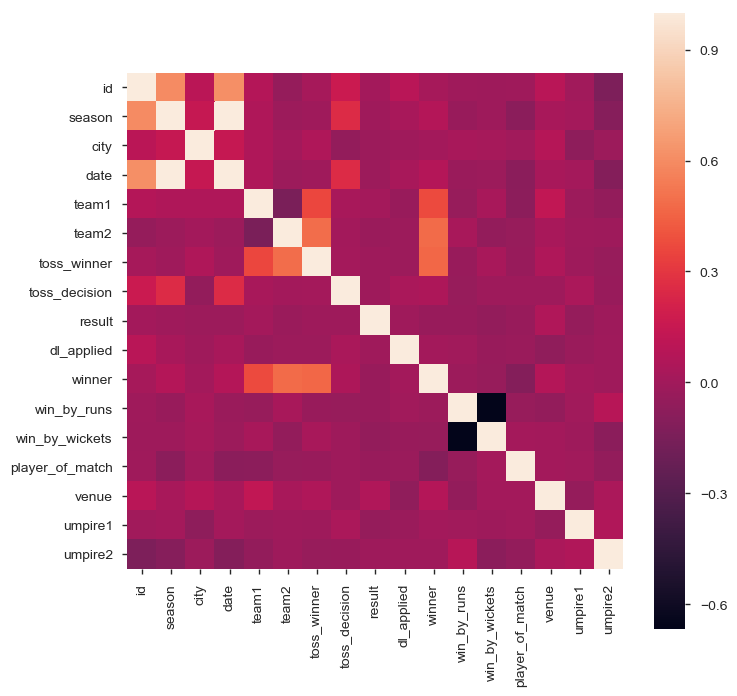

In [18]:
features_correlation = matches_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False)
plt.show()

- There is a positive correlation between toss winner and winner, i.e winning toss helps in winning match.
- There is negative correlation between win_by_runs and win_by_wickets, and we know that if one value is zero then other would be a non-zero value

<a id=section5></a> 
## 5. Questions

<a id=section501></a>
### 5.1 Which season had most number of matches ? 

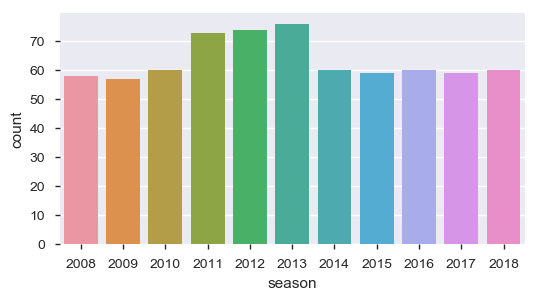

In [104]:
plt.figure(figsize=(6, 3))
sns.countplot(x='season', data=matches)

From __2011-2013(73,74,76)__ we had more number of matches compared to other seasons and __2013__ had the _most number of matches_.

<a id=section502></a>
### 5.2 Season Winners

In [105]:
Finals_Date = matches.groupby('season')['date'].max()
data = []
for x in Finals_Date:
    data.append([matches[matches['date']== x].season.values,matches[matches['date']== x].winner.values])
Season_winners = pd.DataFrame(data,columns=['season','winner'])
Season_winners

,season,winner
0,[2008],[Rajasthan Royals]
1,[2009],[Sunrisers Hyderabad]
2,[2010],[Chennai Super Kings]
3,[2011],[Chennai Super Kings]
4,[2012],[Kolkata Knight Riders]
5,[2013],[Mumbai Indians]
6,[2014],[Kolkata Knight Riders]
7,[2015],[Mumbai Indians]
8,[2016],[Sunrisers Hyderabad]
9,[2017],[Mumbai Indians]


__Mumbai Indians and Chennai Super Kings__ won the title maximum number of times(i.e 3 each).
Winner title is won by only 5 teams till now(__Sunrisers Hyderabad, Rajasthan royals, Kolkata Knight Riders__ apart from above two.)

<a id=section503></a>
### 5.3 Most successful IPL Team

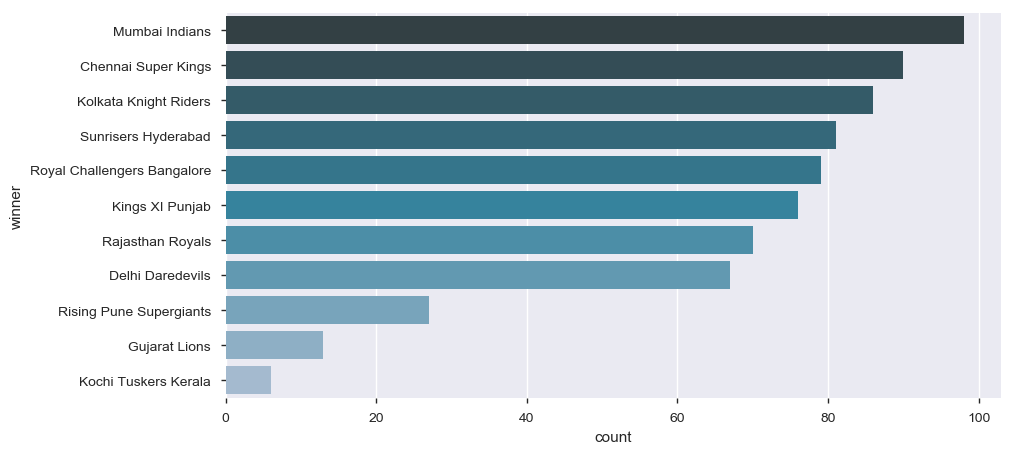

In [106]:
fig,ax =plt.subplots(figsize=(10,5))
sns.countplot(data = matches,y ='winner',order=matches['winner'].value_counts().index,palette="PuBuGn_d")

Most winning team is the most successful team. __Mumbai Indians__ is the most successful team followed by __Chennai Super Kings__ and __Kolkata Knight Riders__ .

<a id=section504></a>
### 5.4 Which is the best defending team ? 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

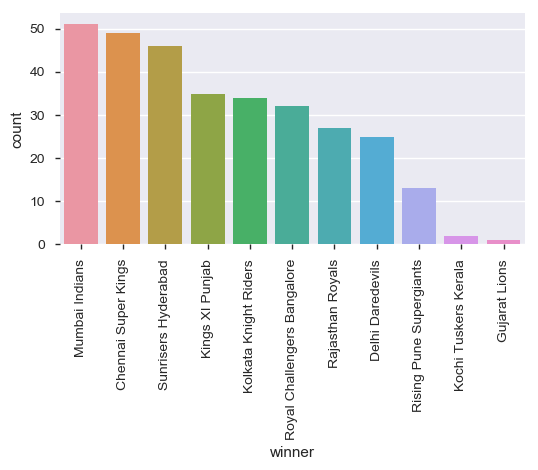

In [96]:
plt.figure(figsize=(6, 3))
a = matches[matches['win_by_runs'] !=0]
sns.countplot(x='winner',data=a,order = a['winner'].value_counts().index)
plt.xticks(rotation = 90)

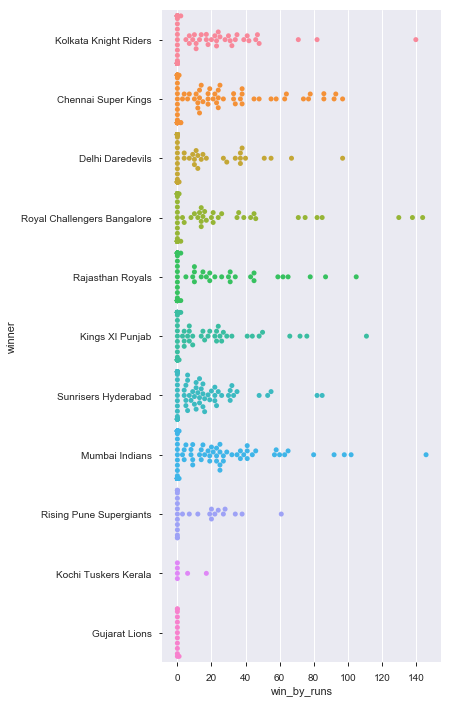

In [199]:
plt.figure(figsize=(5,12))
sns.swarmplot(x='win_by_runs',y='winner',data=matches)
           

__Mumbai Indians__ is the best defending team followed by __Chennai Super Kings__ and __Sunrisers Hyderabad__ .

<a id=section505></a>
### 5.5 Which is the best chasing team ? 

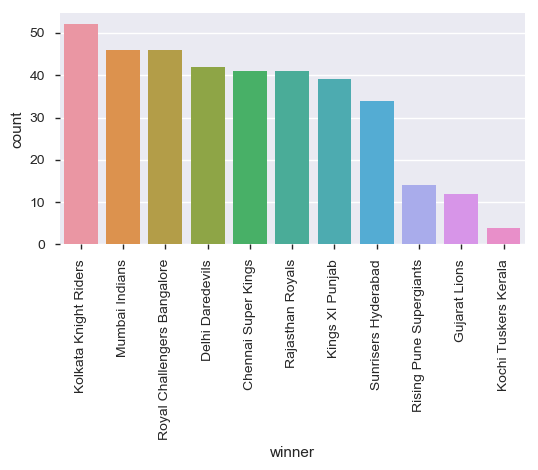

In [107]:
plt.figure(figsize=(6, 3))
a = matches[matches['win_by_wickets'] !=0]
sns.countplot(x='winner',data=a,order = a['winner'].value_counts().index)
plt.xticks(rotation = 90)

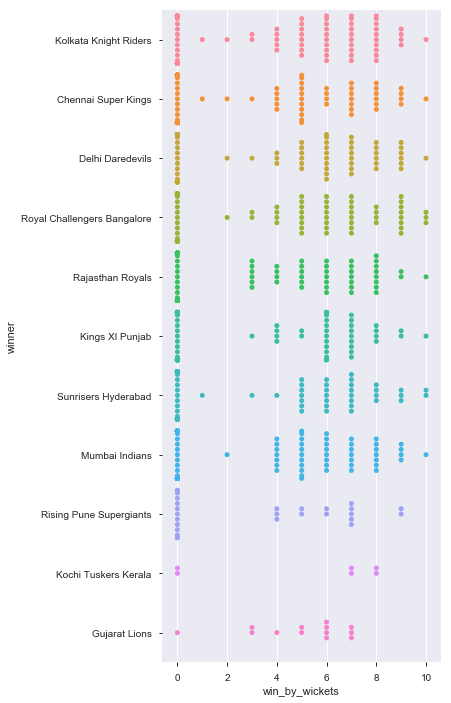

In [200]:
plt.figure(figsize=(5,12))
sns.swarmplot(x='win_by_wickets',y='winner',data=matches)

__Kolkata Knight Riders__ is the best chasing team followed by __Mumbai Indians__ and __Royal Challengers Bangalore__ .

<a id=section506></a>
### 5.6 Most number of Man of the Match awards in IPL

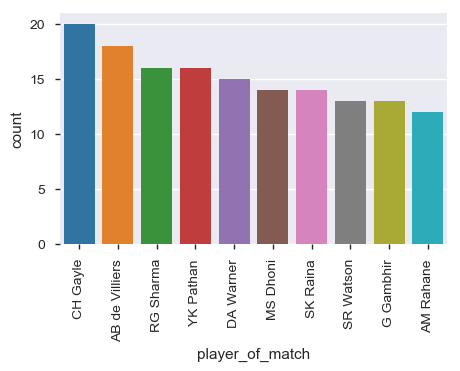

In [111]:
plt.figure(figsize=(5, 3))
sns.countplot(x='player_of_match',data=matches,order=matches['player_of_match'].value_counts().head(10).index)
plt.xticks(rotation = 90)
plt.savefig('Most_ManoftheMatch .png')

__CH Gayle__ is the most frequent player of match for all the seasons followed by __AB de Villers__ .

<a id=section507></a>
### 5.7 Has toss winning helped in match winning ? 

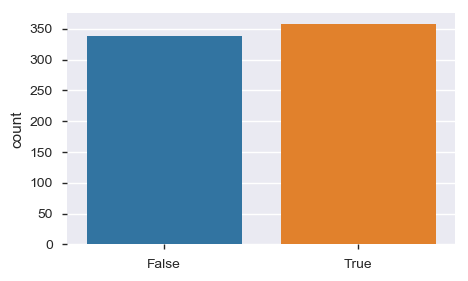

In [112]:
plt.figure(figsize=(5, 3))
sns.countplot(matches['toss_winner']==matches['winner'])
plt.savefig('TosswinnerVsWinner.png')

__Toss winning__ seem to have a slight _positive affect_ on __winning__ in IPL from 2008 to 2018.

<a id=section508></a>
### 5.8 What toss decision helped toss winner to win the match ?


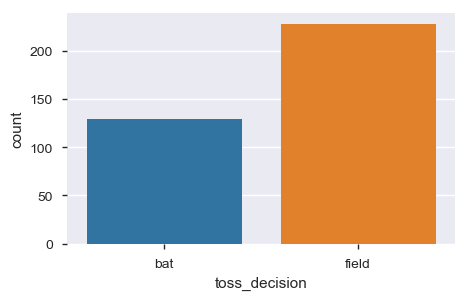

In [113]:
plt.figure(figsize=(5, 3))
sns.countplot(matches['toss_decision'][matches['toss_winner']==matches['winner']])
plt.savefig('TossdecisionVsWinnerall.png')

__Choosing to field first helped__ the toss winner to succeed than to bat first in IPL from 2008 to 2018.

<a id=section509></a>
### 5.9 Which toss decision helped which team to win matches ?

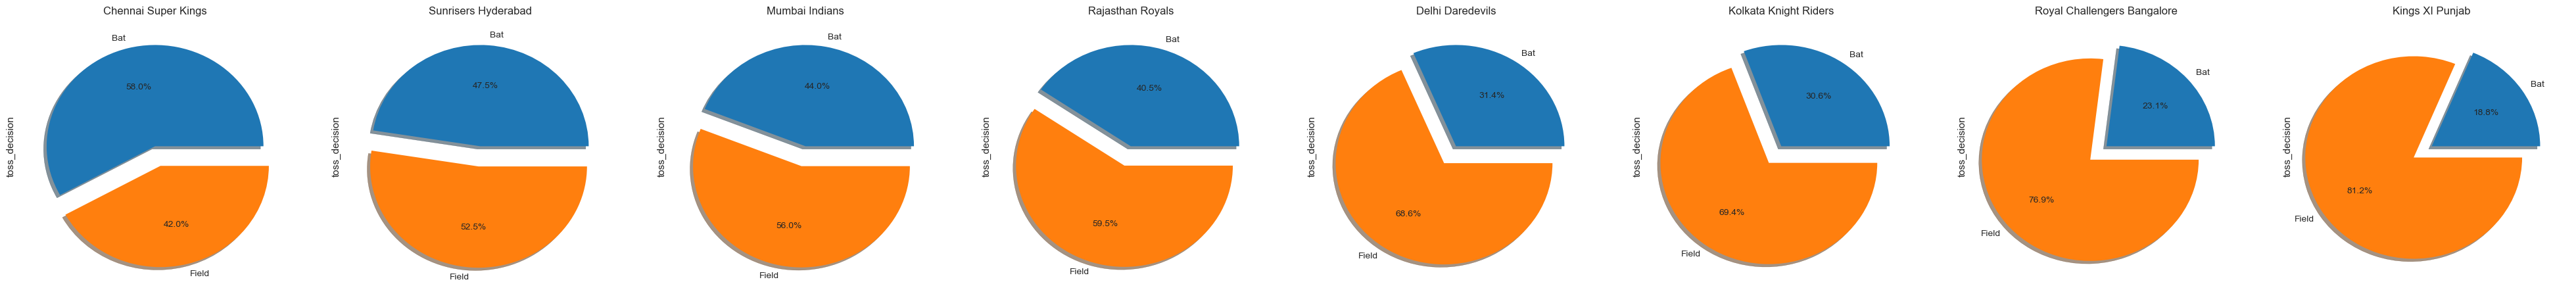

In [114]:
data1 = matches[matches['toss_winner']==matches['winner']]
data1 = data1.groupby(['winner','toss_decision'])['toss_decision'].count()
labels = 'Bat', 'Field'
f,ax = plt.subplots(1,8,figsize=(50,5))
data1['Chennai Super Kings'].plot.pie(explode=[0,0.2],labels =labels, autopct='%1.1f%%',ax=ax[0],shadow=True)
data1['Sunrisers Hyderabad'].plot.pie(explode=[0,0.2],labels =labels, autopct='%1.1f%%',ax=ax[1],shadow=True)
data1['Mumbai Indians'].plot.pie(explode=[0,0.2],labels =labels, autopct='%1.1f%%',ax=ax[2],shadow=True)
data1['Rajasthan Royals'].plot.pie(explode=[0,0.2],labels =labels, autopct='%1.1f%%',ax=ax[3],shadow=True)
data1['Delhi Daredevils'].plot.pie(explode=[0,0.2],labels =labels, autopct='%1.1f%%',ax=ax[4],shadow=True)
data1['Kolkata Knight Riders'].plot.pie(explode=[0,0.2],labels =labels, autopct='%1.1f%%',ax=ax[5],shadow=True)
data1['Royal Challengers Bangalore'].plot.pie(explode=[0,0.2],labels =labels, autopct='%1.1f%%',ax=ax[6],shadow=True)
data1['Kings XI Punjab'].plot.pie(explode=[0,0.2],labels =labels, autopct='%1.1f%%',ax=ax[7],shadow=True)
ax[0].set_title('Chennai Super Kings')
ax[1].set_title('Sunrisers Hyderabad')
ax[2].set_title('Mumbai Indians')
ax[3].set_title('Rajasthan Royals')
ax[4].set_title('Delhi Daredevils')
ax[5].set_title('Kolkata Knight Riders')
ax[6].set_title('Royal Challengers Bangalore')
ax[7].set_title('Kings XI Punjab')
plt.savefig('TossdecisionVsTeams.png')

- _Toss Decision_ to __bat__ have a increased winning chances for __Chennai Super Kings__ only.
- _Toss Decision_ to __field__ have a increased winning chances for __Kings XI Punjab__ and __Royal Challengers banglore__
- __81.2%__ times __Kings XI Punjab__ won toss and match , toss decision was to field. 
- __76.9%__ times __Royal Challengers banglore__ won toss and match , toss decision was to field. 
- __58%__ times __Chennai Super Kings__ won toss and match , toss decision was to bat. 

<a id=section510></a>
### 5.10 Which toss decision helped teams to win when DL was applied ?

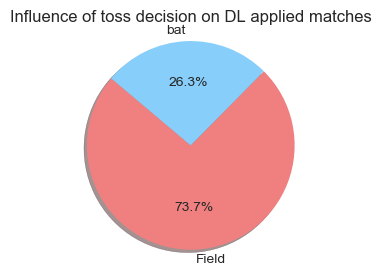

In [116]:
toss_dec_won = matches_new['toss_decision'][ (matches_new['dl_applied'] == 1) & (matches_new['toss_winner'] == matches_new['winner']) ]
toss_dec_lost = matches_new['toss_decision'][(matches['dl_applied'] == 1) & (matches_new['toss_winner'] != matches_new['winner'])]
toss_dec_lost = toss_dec_lost.apply(lambda x: 1 if x == 0 else 0)
toss_dec = toss_dec_won.append(toss_dec_lost)
toss_dec.value_counts()

plt.figure(figsize=(3,3))
plt.title("Influence of toss decision on DL applied matches")
plt.pie(toss_dec.value_counts(), labels = ['Field','bat'], colors=['lightcoral', 'lightskyblue'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.savefig('Tossdecision_DL.png')

__73.7% Duckworth–Lewis__ applied matches were won by __chasing team__ i.e _toss decision to Field_ has positive influence on winning in such matches.

<a id=section511></a>
### 5.11 Which is the best stadium for winning by wickets ?

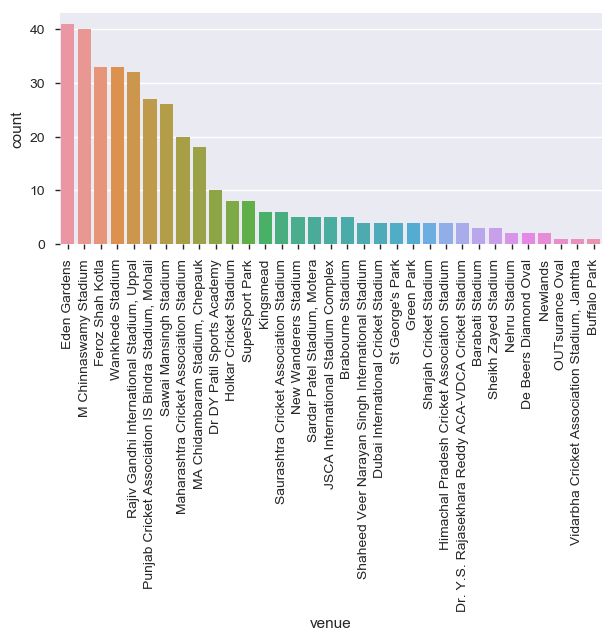

In [117]:
fig,ax =plt.subplots(figsize=(7,3))
a = matches[matches['win_by_wickets'] !=0]
sns.countplot(x='venue',data=a,order = a['venue'].value_counts().index)
plt.xticks(rotation = 90)
plt.savefig('Venue_bywickets.png')

__Eden Gardens ,M Chinnaswamy Stadium, Feroz Shah Kotla__ are top 3 venues for winning by wickets, i.e good for chasing.

<a id=section512></a>
### 5.12 Which is the best stadium for winning by runs ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

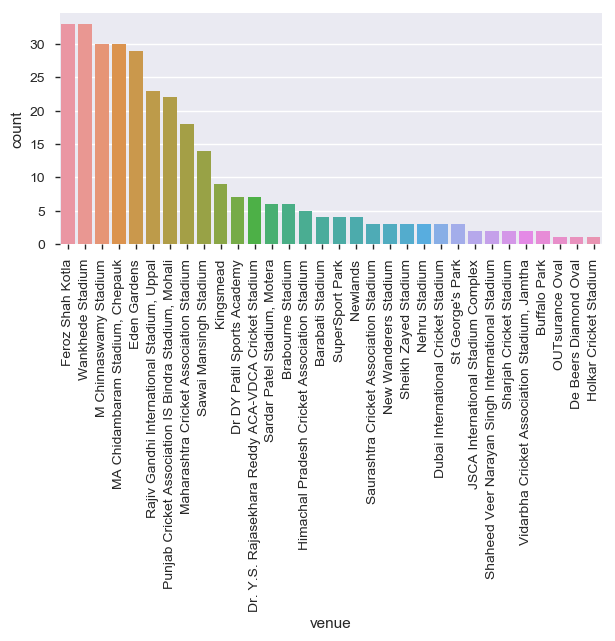

In [131]:
fig,ax =plt.subplots(figsize=(7,3))
b = matches[matches['win_by_runs'] !=0]
sns.countplot(x='venue',data=b,order = b['venue'].value_counts().index)
plt.xticks(rotation = 90)

__Wankhede Stadium, Feroz Shah Kotla, MA Chidambaram Stadium, Chepauk ,M Chinnaswamy Stadium, Eden Gardens__ are top 5 stadiums for winning by runs.

<a id=section513></a>
### 5.13 Toss decision taken at the venues (Batting first or Fielding first)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

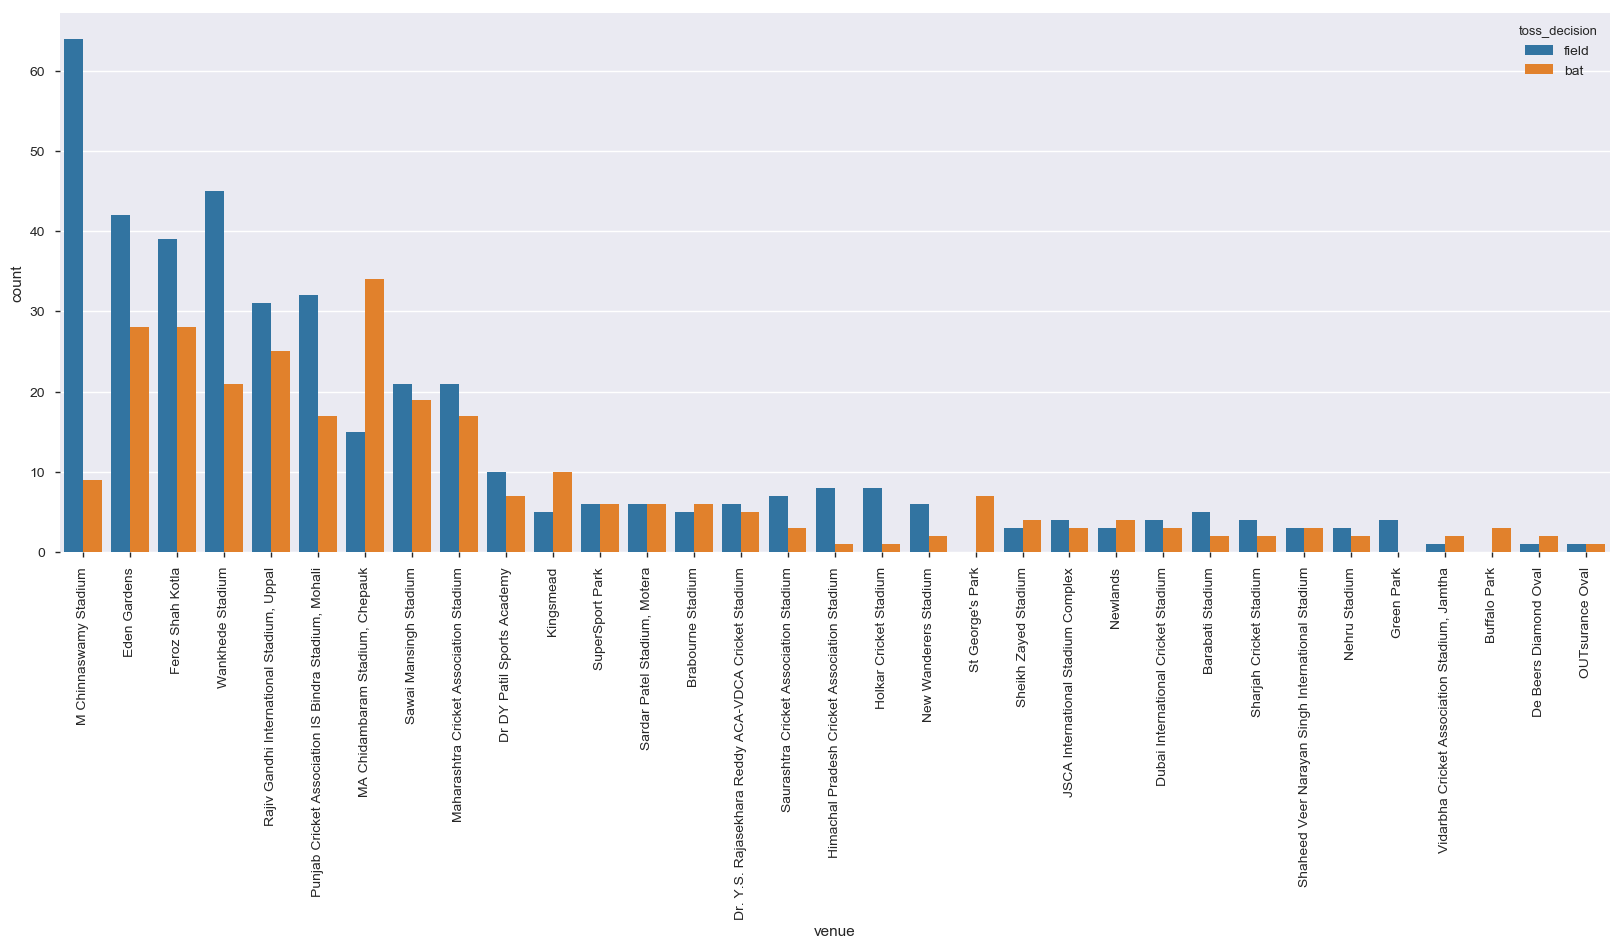

In [120]:
x = matches['venue'].value_counts(ascending=False)
Venue = x.index
total = matches['venue'].value_counts(ascending=False)
bat =  matches['venue'][ matches['toss_decision']=='bat'].value_counts()
field =  matches['venue'][ matches['toss_decision']=='field'].value_counts()
field_per = (field/total).sort_values(ascending=False)
bat_per = (bat/total).sort_values(ascending=False)
venue_pitch = pd.concat([total, field_per,bat_per], axis=1, keys=['Total', 'Toss_decision = field','Toss_decision = bat'])
venue_pitch.reset_index(inplace=True)
venue_pitch.sort_values(by='Total', ascending=False)
plt.figure(figsize=(20,7))
sns.countplot(x='venue',hue='toss_decision',data=matches,order=matches['venue'].value_counts().index)
plt.xticks(rotation = 90)

- At M Chinnaswamy stadium very high number of teams choose to field first, indicating it to be best batting pitch.
- At MA Chidambaram stadium,chepauk very high number of teams choose to bat first, indicating it to be best bowling pitch.

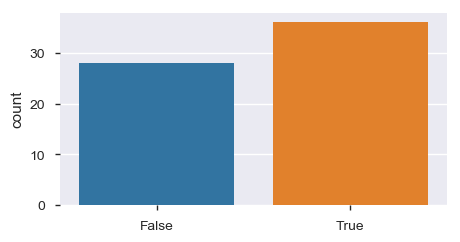

In [28]:
MC = matches[['winner','toss_winner']][ (matches['toss_decision']=='field') &  (matches['venue'] == 'M Chinnaswamy Stadium')]
plt.figure(figsize=(5,2.5))
sns.countplot(MC['winner'] == MC['toss_winner'])

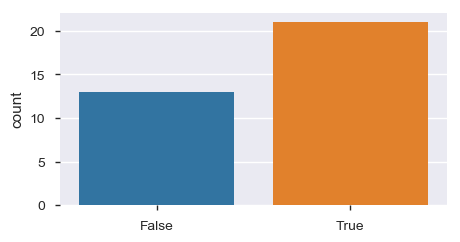

In [30]:
MA_C = matches[['winner','toss_winner']][ (matches['toss_decision']=='bat') &  (matches['venue'] == 'MA Chidambaram Stadium, Chepauk')]
plt.figure(figsize=(5,2.5))
sns.countplot(MA_C['winner'] == MA_C['toss_winner'])

<a id=section514></a>
### 5.14 In which city did weather affect matches? 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

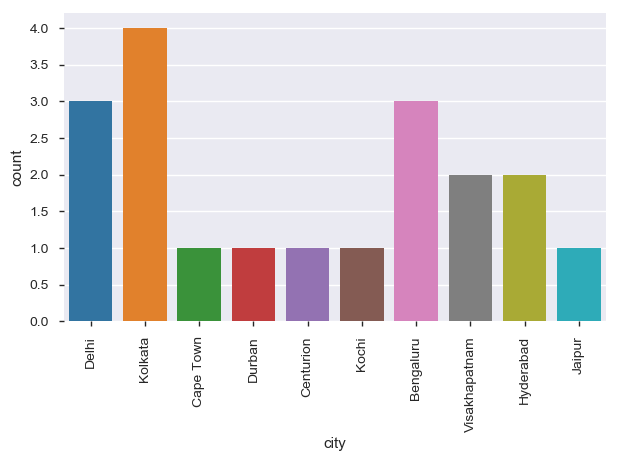

In [134]:
a= matches[matches['dl_applied'] ==1]
plt.figure(figsize=(7,4))
sns.countplot(x='city',data=a)
plt.xticks(rotation = 90)

Weather of __Kolkata__ city was responsible for __21%__ of affected matches(4), followed by __Delhi__ and __Bengaluru__ at 3 and __Hyderabad__ and __Vishakapatnam__ at 2 . 

<a id=section515></a>
###  5.15 Win percentage of teams who won the toss for each team.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

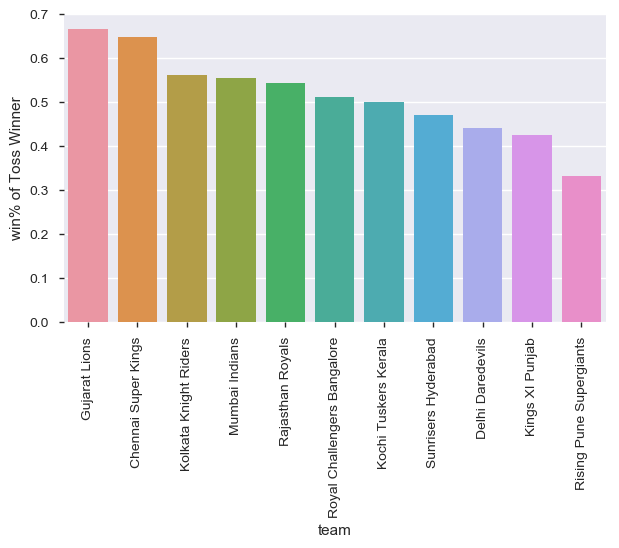

In [135]:
teams=matches['team1'].append(matches['team2']).unique()
ts = matches.groupby(['toss_winner','winner'])['team1'].count()
win_ = pd.DataFrame(columns=['team','win% of Toss Winner'])
win_['team'] = teams
for x in win_['team'] :
    win_['win% of Toss Winner'][win_['team'] == x] = ts[x][x]/ts[x][:].sum()
win_.sort_values(by="win% of Toss Winner",inplace=True,ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x="team", y="win% of Toss Winner", data=win_)
plt.xticks(rotation = 90)

<a id=section516></a>
### 5.16 Win % of teams at their respective home venues

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

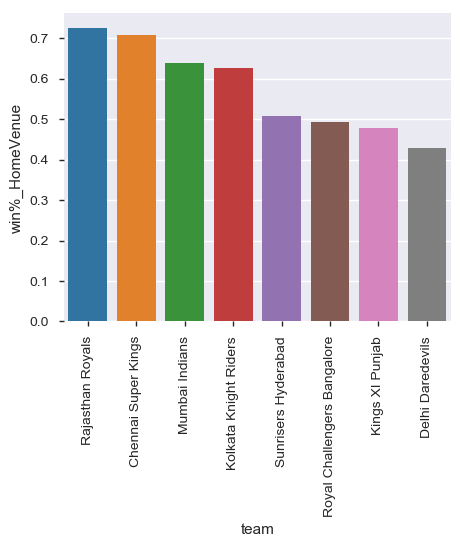

In [137]:
plt.figure(figsize=(5,4))
teams_homevenue = {'Mumbai':'Mumbai Indians','Chennai':'Chennai Super Kings','Jaipur':'Rajasthan Royals','Hyderabad':'Sunrisers Hyderabad','Delhi':'Delhi Daredevils','Kolkata':'Kolkata Knight Riders',
'Bengaluru':'Royal Challengers Bangalore','Chandigarh':'Kings XI Punjab'}
home_win = {}
for key, val in teams_homevenue.items() :
    x = len(matches[(matches['team1'] == val) | (matches['team2'] == val)][matches['city'] == key].index)
    y = len(matches[matches['winner'] == val][matches['city'] == key].index)
    z= y/x
    home_win.update({val:z})
win_ = pd.DataFrame(list(home_win.items()),index=range(len(list(home_win.items()))),columns=['team','win%_HomeVenue'])
win_.sort_values(by="win%_HomeVenue",inplace=True,ascending=False)
sns.barplot(x="team", y="win%_HomeVenue", data=win_)
plt.xticks(rotation = 90)

<a id=section517></a>
### 5.17 What are the best Chasing venues ? 

In [145]:
matches['venue'][matches['win_by_wickets']!=0].value_counts().head(10)

Eden Gardens                                            41
M Chinnaswamy Stadium                                   40
Feroz Shah Kotla                                        33
Wankhede Stadium                                        33
Rajiv Gandhi International Stadium, Uppal               32
Punjab Cricket Association IS Bindra Stadium, Mohali    27
Sawai Mansingh Stadium                                  26
Maharashtra Cricket Association Stadium                 20
MA Chidambaram Stadium, Chepauk                         18
Dr DY Patil Sports Academy                              10
Name: venue, dtype: int64

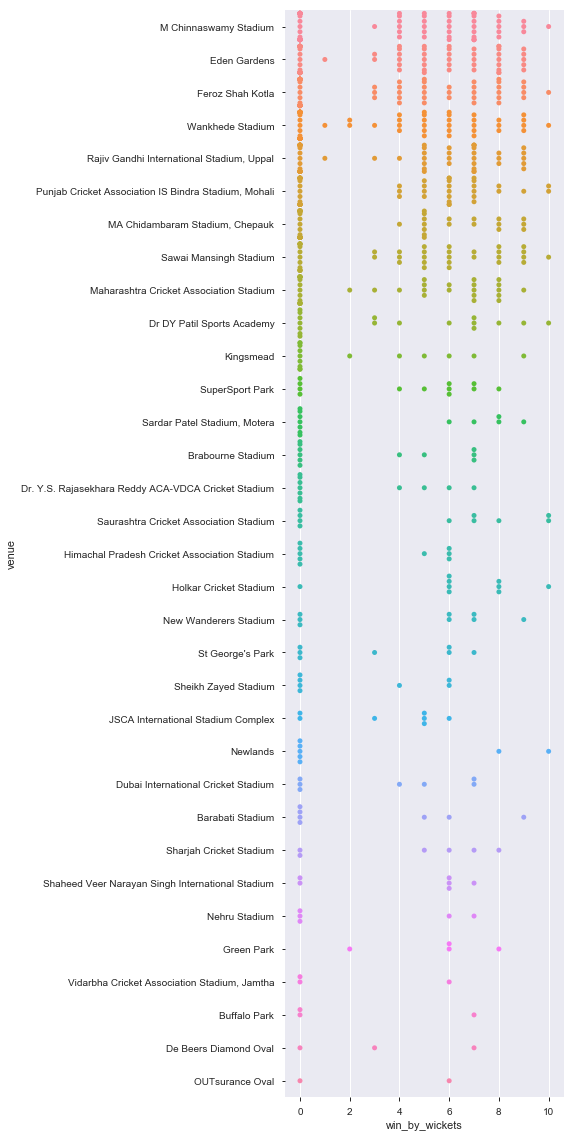

In [207]:
fig,ax =plt.subplots(figsize=(5,20))
sns.swarmplot(y='venue',x='win_by_wickets',data=matches,order=matches['venue'].value_counts().index)

<a id=section518></a>
### 5.18 What are the best defending venues ? 

In [154]:
matches['venue'][matches['win_by_runs']!=0].value_counts().head(10)

Wankhede Stadium                                        33
Feroz Shah Kotla                                        33
MA Chidambaram Stadium, Chepauk                         30
M Chinnaswamy Stadium                                   30
Eden Gardens                                            29
Rajiv Gandhi International Stadium, Uppal               23
Punjab Cricket Association IS Bindra Stadium, Mohali    22
Maharashtra Cricket Association Stadium                 18
Sawai Mansingh Stadium                                  14
Kingsmead                                                9
Name: venue, dtype: int64

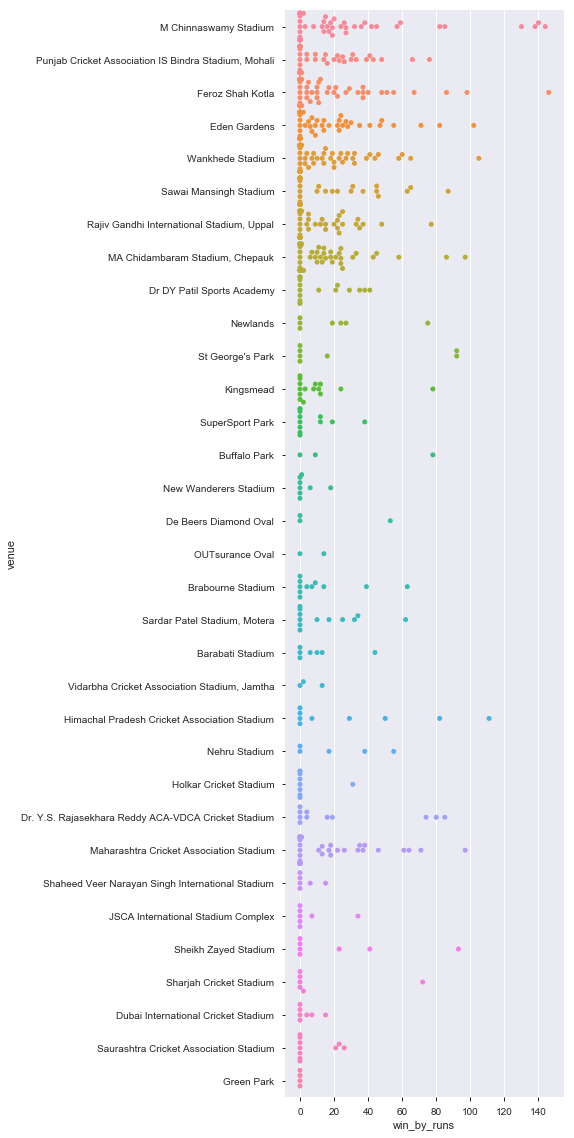

In [210]:
fig,ax =plt.subplots(figsize=(5,20))
sns.swarmplot(y='venue',x='win_by_runs',data=matches)

<a id=section519></a>
### 5.19 Max win_by_runs / win_by_wickets by team

In [201]:
dt = matches.groupby(['winner','win_by_runs','win_by_wickets','season','venue'])['win_by_runs'].count()
dt.sort_index(level=1,ascending=False).head(10)

winner                       win_by_runs  win_by_wickets  season  venue                                       
Mumbai Indians               146          0               2017    Feroz Shah Kotla                                1
Royal Challengers Bangalore  144          0               2016    M Chinnaswamy Stadium                           1
Kolkata Knight Riders        140          0               2008    M Chinnaswamy Stadium                           1
Royal Challengers Bangalore  138          0               2015    M Chinnaswamy Stadium                           1
                             130          0               2013    M Chinnaswamy Stadium                           1
Kings XI Punjab              111          0               2011    Himachal Pradesh Cricket Association Stadium    1
Rajasthan Royals             105          0               2008    Wankhede Stadium                                1
Mumbai Indians               102          0               2018    Eden Garden

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

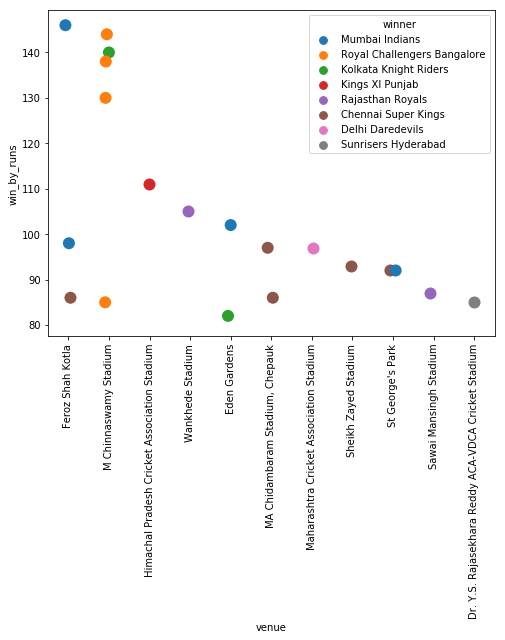

In [181]:
fig,ax =plt.subplots(figsize=(8,6))
a = matches.sort_values(by ='win_by_runs',ascending=False)
sns.stripplot(data = a[['winner','venue','win_by_runs']].head(20),size= 12,y ='win_by_runs',x='venue',hue ='winner')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

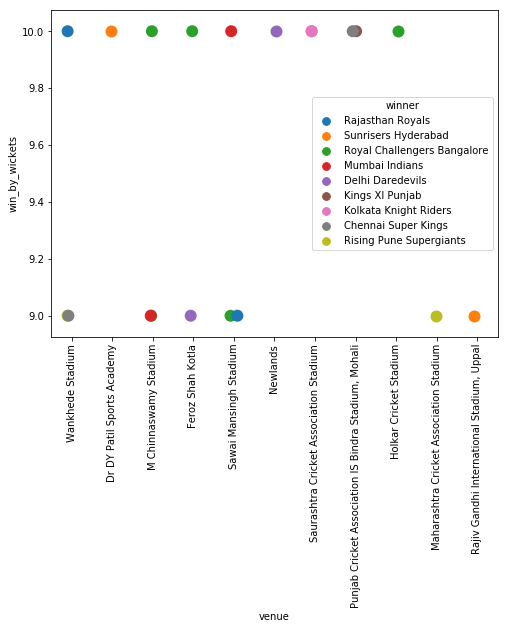

In [183]:
fig,ax =plt.subplots(figsize=(8,6))
a = matches.sort_values(by ='win_by_wickets',ascending=False)
sns.stripplot(data = a[['winner','venue','win_by_wickets']].head(20),size= 12,y ='win_by_wickets',x='venue',hue ='winner')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

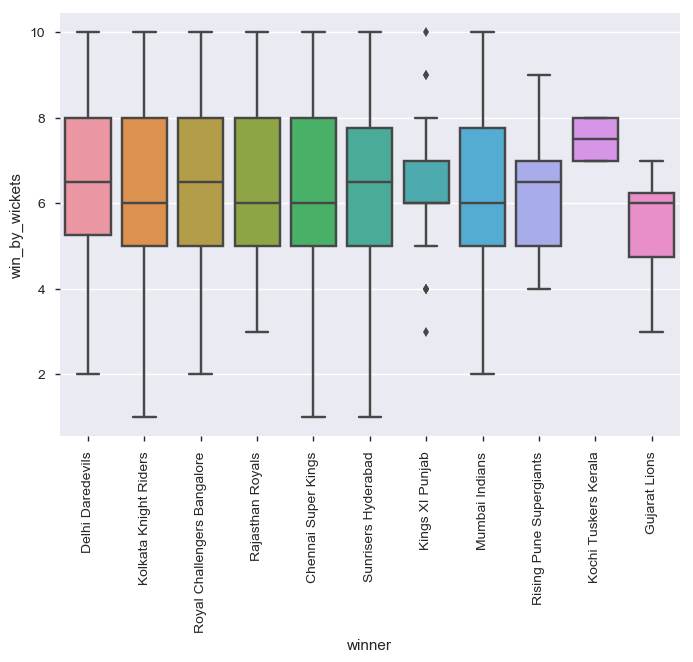

In [121]:
sns.boxplot(data = a[['winner','venue','win_by_wickets']],y ='win_by_wickets',x='winner')
plt.xticks(rotation = 90)

<a id=section520></a>
### 5.20 Most utilized venues

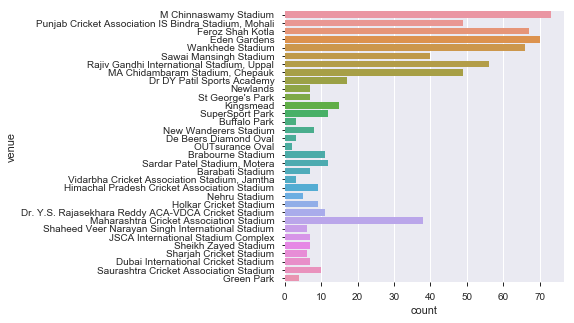

In [212]:
fig,ax =plt.subplots(figsize=(5,5))
sns.countplot(y='venue',data=matches)

M Chinnaswamy stadium is the most utilized venue.

<a id=section6></a>
## 6. Conclusions and Actionable Items

- Mumbai Indians and Chennai Super Kings are both best chasing teams as well as defending teams, which justifies they being most title winners.
- Toss Decision of fielding first positively influences almost all IPL teams in all seasons. 
- Home Venue has positive correlation with winning chances for major teams.
- Venue, toss winner, toss decision have strong correlation with result of the match, hence these three variables should be included in any kind of prediction modelling on this data.
- As we have seen Mumbai Indians and Chennai Super Kings are the best teams, any marketing company can tap their reputation for promotion of their goods and services.
